<a href="https://colab.research.google.com/github/athiyan-s/object-counting/blob/main/pipecounting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

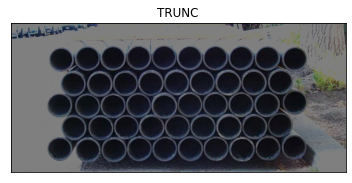

'box, label, count = cv.detect_common_objects(image)\noutput = draw_bbox(image, box, label, count)\nplt.imshow(output)\nplt.show()\nprint("Number of cars in this image are " +str(label.count(\'car\')))\n\n'

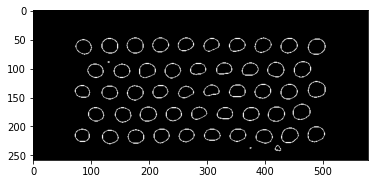

In [12]:
import cv2 
import cvlib as cv
import numpy as np
from matplotlib import pyplot as plt
import skimage.io
import skimage.color
from skimage.color import label2rgb, rgb2gray
import skimage.filters
from skimage import feature
from skimage.measure import find_contours
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly



#raw image 
image = skimage.io.imread("images.jpeg")

ret,thresh3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)#the image is set to TRUNC theshold


titles = 'TRUNC'
images = thresh3

plt.imshow(images,'gray',vmin=0,vmax=255)
plt.title(titles)
plt.xticks([]),plt.yticks([])
plt.show()#the theshold image is shown

gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
blurred_image = skimage.filters.gaussian(gray, sigma=1.0)
#the image is been blurred

t = 0.1# the threshold value

"""#the image is been masked over here
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()"""#the masked image is shown

blur = cv2.blur(blurred_image, (11, 11), 0)




binary_mask = blur < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
grayCol = binary_mask

"""canny = cv2.Canny(grayCol, 30, 150,30)
plt.imshow(canny, cmap='gray')"""
edges = feature.canny(grayCol, sigma=0)

plt.imshow(edges, cmap='gray')

"""box, label, count = cv.detect_common_objects(image)
output = draw_bbox(image, box, label, count)
plt.imshow(output)
plt.show()
print("Number of cars in this image are " +str(label.count('car')))

"""

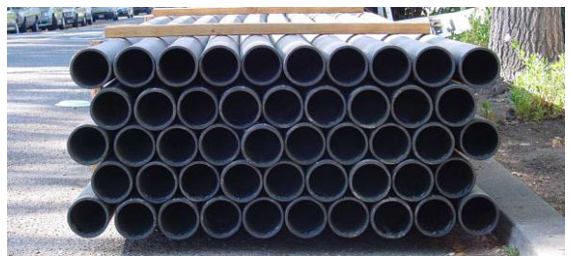

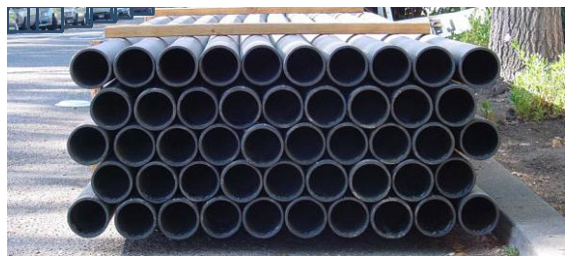

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

img = cv2.imread('/content/images.jpeg')
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img1)
plt.show()

box, label, count = cv.detect_common_objects(img)
output = draw_bbox(img, box, label, count)

output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(output)
plt.show()

In [2]:
pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 15.2 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=9b26ae62d8ff683d961954ea3382149ff0dc0c63af1be74ef68c7a88ddfe7997
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=258338d8a20d65239b019db3185ab4fbe28c8240948be964d6274247e2c6dd49
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


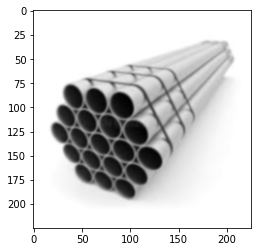

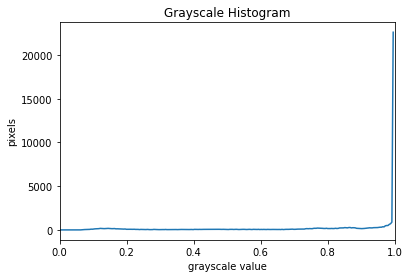

Found automatic threshold t = 0.6236651012949967.


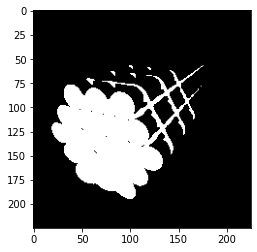

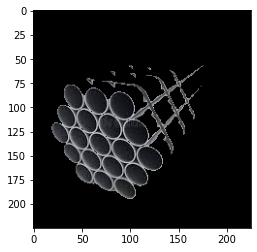

'\ncanny = cv2.Canny(blur, 30, 150, 3)\nplt.imshow(canny, cmap=\'gray\')\n\ndilated = cv2.dilate(canny, (1, 1), iterations=0)\nplt.imshow(dilated, cmap=\'gray\')\n\n(cnt, hierarchy) = cv2.findContours(\n    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)\nrgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\ncv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)\n \nplt.imshow(rgb)\n\nprint("coins in the image : ", len(cnt))'

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

image = skimage.io.imread("PIP.jpeg")
"""image = cv2.imread('shapes.jpg')"""
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
blurred_image = skimage.filters.gaussian(gray, sigma=1.0)

"""blur = cv2.GaussianBlur(gray, (11, 11), 0)"""
plt.imshow(blurred_image, cmap='gray')

# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

# create a mask based on the threshold

t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))


binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()

# use the binary_mask to select the "interesting" part of the image
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)
plt.show()

"""
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)

print("coins in the image : ", len(cnt))"""

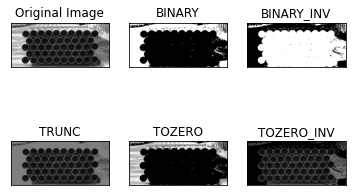

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images.jpeg',0)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()